<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/Prophet_Stationary_univariate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hourly

In [152]:
!pip install Prophet

In [153]:
from prophet import Prophet

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [155]:
df = pd.read_csv('https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/energy_consumption.csv')
data = df.copy()
data.head()

,timeStamp,demand,precip,temp
0,01-01-2012 00:00,4937.5,0.0,46.13
1,01-01-2012 01:00,4752.1,0.0,45.89
2,01-01-2012 02:00,4542.6,0.0,45.04
3,01-01-2012 03:00,4357.7,0.0,45.03
4,01-01-2012 04:00,4275.5,0.0,42.61


In [156]:
data=data[['timeStamp','demand']]
data['timeStamp']=pd.to_datetime(data['timeStamp'],format='%d-%m-%Y %H:%M')
data=data.rename(columns={'timeStamp':'ds','demand':'y'})
data.head()

,ds,y
0,2012-01-01 00:00:00,4937.5
1,2012-01-01 01:00:00,4752.1
2,2012-01-01 02:00:00,4542.6
3,2012-01-01 03:00:00,4357.7
4,2012-01-01 04:00:00,4275.5


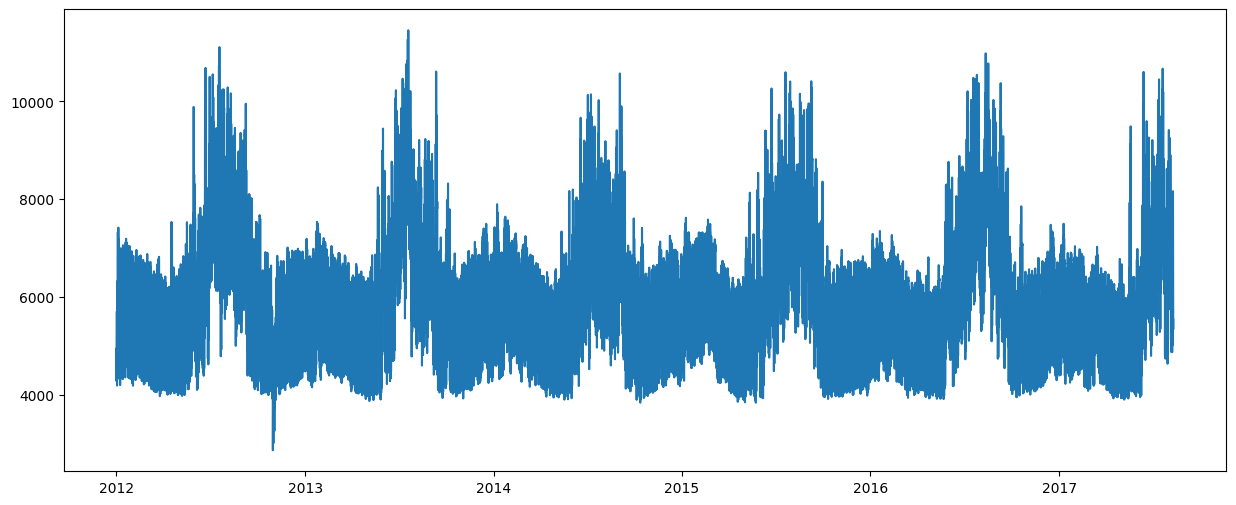

In [157]:
plt.figure(figsize=(15,6))
plt.plot(data['ds'],data['y'])
plt.show()

In [158]:
model_hourly = Prophet(interval_width=0.95,yearly_seasonality = True)

In [159]:
train=data[(data['ds'] >= '2012-01-01') & (data['ds'] <= '2017-04-30')]
test=data[(data['ds'] > '2017-04-30')]

In [160]:
test.shape

(2502, 2)

In [161]:
model_hourly.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/tvbzh1oq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/a6s2ifja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63700', 'data', 'file=/tmp/tmpdwhekbxv/tvbzh1oq.json', 'init=/tmp/tmpdwhekbxv/a6s2ifja.json', 'output', 'file=/tmp/tmpdwhekbxv/prophet_modeld_h4quyw/prophet_model-20230908154118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [162]:
forecast_index_hourly = model_hourly.make_future_dataframe(periods=2502,freq='h')

In [163]:
forecast_hourly = model_hourly.predict(forecast_index_hourly)


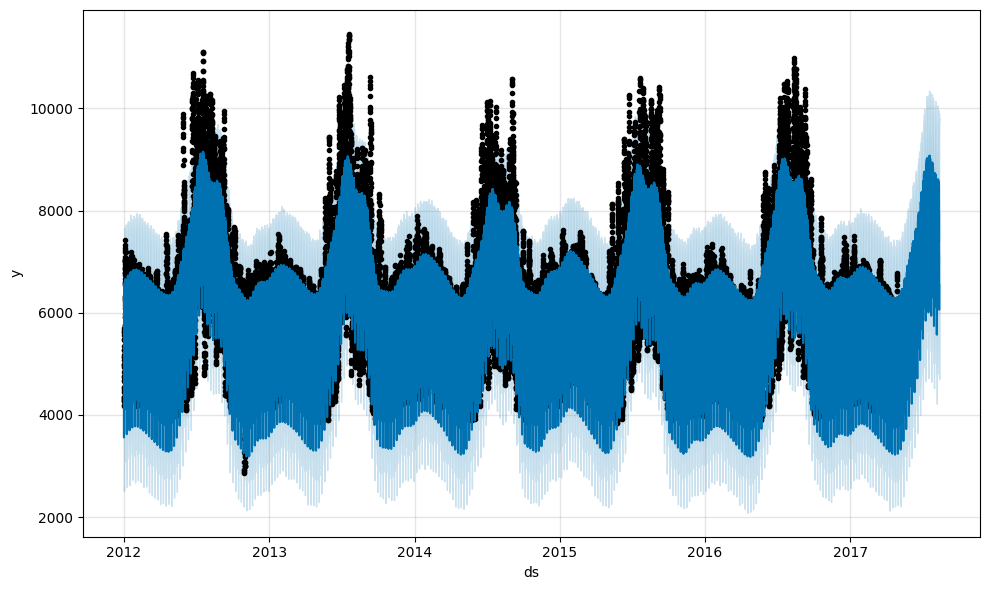

In [164]:
model_hourly.plot(forecast_hourly)
plt.show()

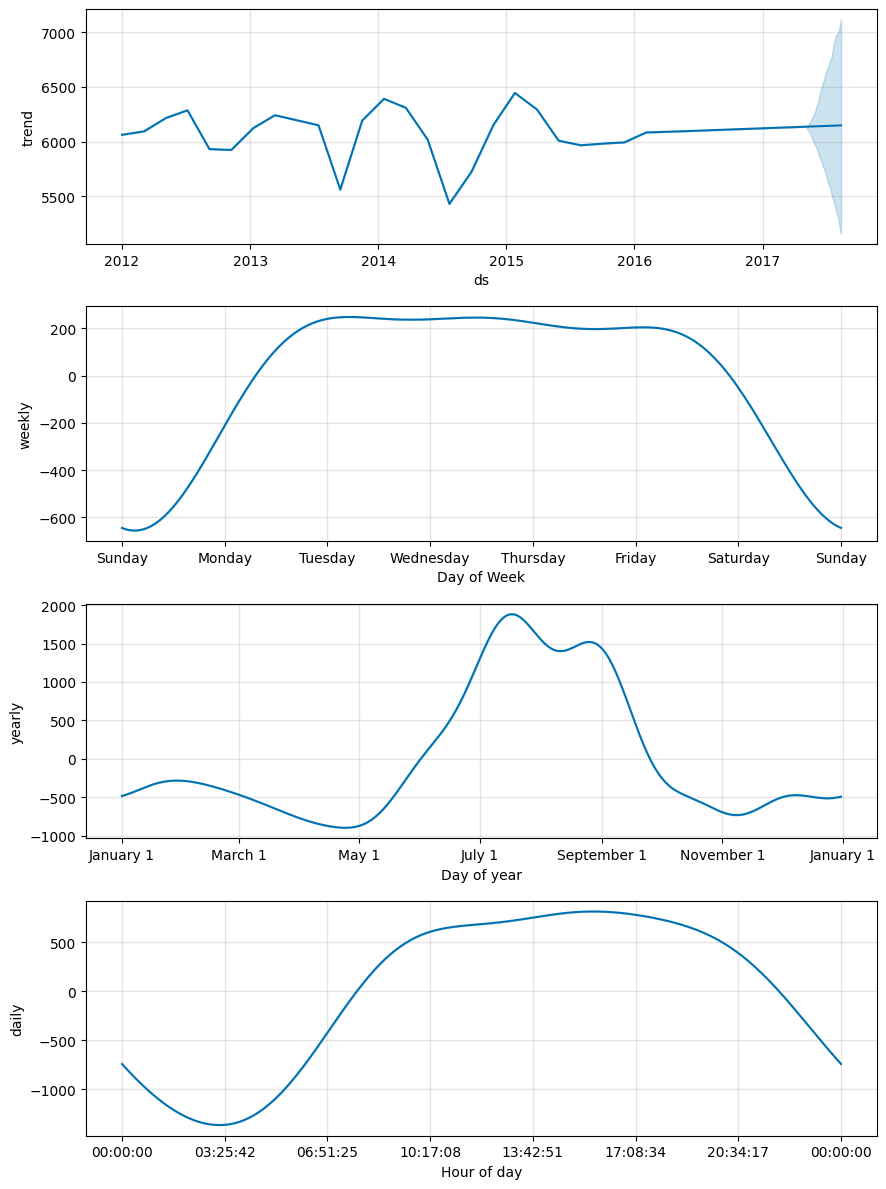

In [165]:
model_hourly.plot_components(forecast_hourly)
plt.show()

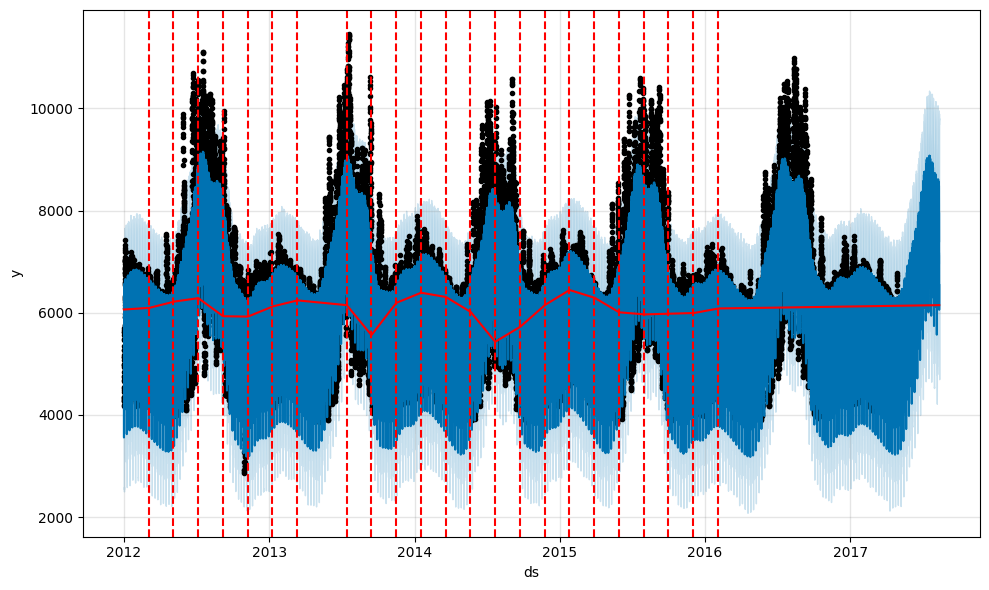

In [166]:
from prophet.plot import add_changepoints_to_plot
fig = model_hourly.plot(forecast_hourly)
a = add_changepoints_to_plot(fig.gca(), model_hourly, forecast_hourly)

In [167]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = model_hourly, initial = '731 days', horizon = '365 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/_d7qlhq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/4puvntax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18660', 'data', 'file=/tmp/tmpdwhekbxv/_d7qlhq3.json', 'init=/tmp/tmpdwhekbxv/4puvntax.json', 'output', 'file=/tmp/tmpdwhekbxv/prophet_model_g70nteo/prophet_model-20230908154209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:42:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:42:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/gb5niu5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/gv41gqpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [168]:
from prophet.diagnostics import performance_metrics
data_metrics = performance_metrics(cv_results)
data_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 11:00:00,226181.325509,475.585245,357.661106,0.064843,0.050343,0.065064,0.957714
1,36 days 12:00:00,226315.256599,475.726031,357.861398,0.064876,0.050412,0.065097,0.957714
2,36 days 13:00:00,226455.681701,475.873598,358.053302,0.064908,0.050428,0.065129,0.957714
3,36 days 14:00:00,226614.001203,476.039916,358.259074,0.064945,0.050460,0.065167,0.957714
4,36 days 15:00:00,226801.162266,476.236456,358.509527,0.064991,0.050534,0.065214,0.957714
...,...,...,...,...,...,...,...,...
7881,364 days 20:00:00,210838.263524,459.171279,348.422376,0.065478,0.052095,0.068404,1.000000
7882,364 days 21:00:00,210774.492122,459.101832,348.339962,0.065475,0.052108,0.068401,1.000000
7883,364 days 22:00:00,210821.541963,459.153070,348.327367,0.065485,0.052108,0.068414,1.000000
7884,364 days 23:00:00,210937.134251,459.278929,348.369846,0.065507,0.052095,0.068441,1.000000


#                                        **Converting hourly data to day wise**

In [169]:
data_daily = df.copy()
data_daily=data_daily[['timeStamp','demand']]
data_daily['timeStamp']=pd.to_datetime(data_daily['timeStamp'],format='%d-%m-%Y %H:%M')
data_daily=data_daily.rename(columns={'timeStamp':'ds','demand':'y'})
data_daily = data_daily.set_index('ds')
data_daily=data_daily.resample('D').mean()
data_daily.head()

,y
ds,
2012-01-01,4954.833333
2012-01-02,5302.954167
2012-01-03,6095.512500
2012-01-04,6336.266667
2012-01-05,6130.245833


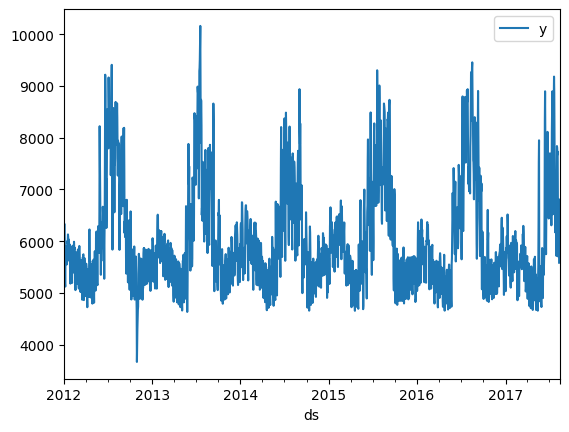

In [170]:
data_daily.plot()
plt.show()

In [171]:
data_daily = data_daily.reset_index()
data_daily.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [172]:
model_daily = Prophet(interval_width=0.95,yearly_seasonality=True)

In [173]:
train_daily=data_daily[(data_daily['ds'] >= '2012-01-01') & (data_daily['ds'] <= '2017-04-30')]
test_daily=data_daily[(data_daily['ds'] > '2017-04-30')]

In [174]:
model_daily.fit(train_daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/sg824sjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/wn1c3a81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3124', 'data', 'file=/tmp/tmpdwhekbxv/sg824sjm.json', 'init=/tmp/tmpdwhekbxv/wn1c3a81.json', 'output', 'file=/tmp/tmpdwhekbxv/prophet_model3l4mycfl/prophet_model-20230908154538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [175]:
model_daily.params

OrderedDict([('lp__', array([[5009.94]])),
             ('k', array([[0.0899833]])),
             ('m', array([[0.593258]])),
             ('delta',
              array([[-4.33704e-08, -5.16484e-04, -1.02992e-01, -6.73948e-05,
                      -1.00692e-08,  1.52527e-07,  7.86818e-08, -3.84996e-08,
                      -5.94425e-07, -1.27338e-08, -2.41748e-02, -7.50125e-02,
                      -3.62350e-03, -3.67540e-08,  2.44874e-01,  1.32752e-06,
                      -1.35102e-06, -9.54238e-02, -4.92822e-02, -7.56347e-08,
                      -3.73215e-08, -5.86820e-08,  2.01528e-02,  2.75393e-03,
                      -3.49011e-07]])),
             ('sigma_obs', array([[0.0459493]])),
             ('beta',
              array([[-0.0346386 , -0.070547  ,  0.057595  ,  0.047077  , -0.0140599 ,
                      -0.00500259, -0.0038673 , -0.00074495,  0.00241638, -0.00755401,
                       0.0040572 ,  0.00483102, -0.00789671, -0.00470533,  0.00701821,
          

In [176]:
test_daily.shape

(104, 2)

In [177]:
future_daily = model_daily.make_future_dataframe(periods=222)
future_daily.tail()

,ds
2164,2017-12-04
2165,2017-12-05
2166,2017-12-06
2167,2017-12-07
2168,2017-12-08


In [178]:
forecast_daily = model_daily.predict(future_daily)
forecast_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2164,2017-12-04,5788.324228,4864.308625,6713.119199
2165,2017-12-05,5901.119297,5031.142338,6809.036327
2166,2017-12-06,5902.776501,4972.451706,6800.413272
2167,2017-12-07,5865.737427,4978.385640,6736.707939
2168,2017-12-08,5825.123991,4875.919000,6747.606037


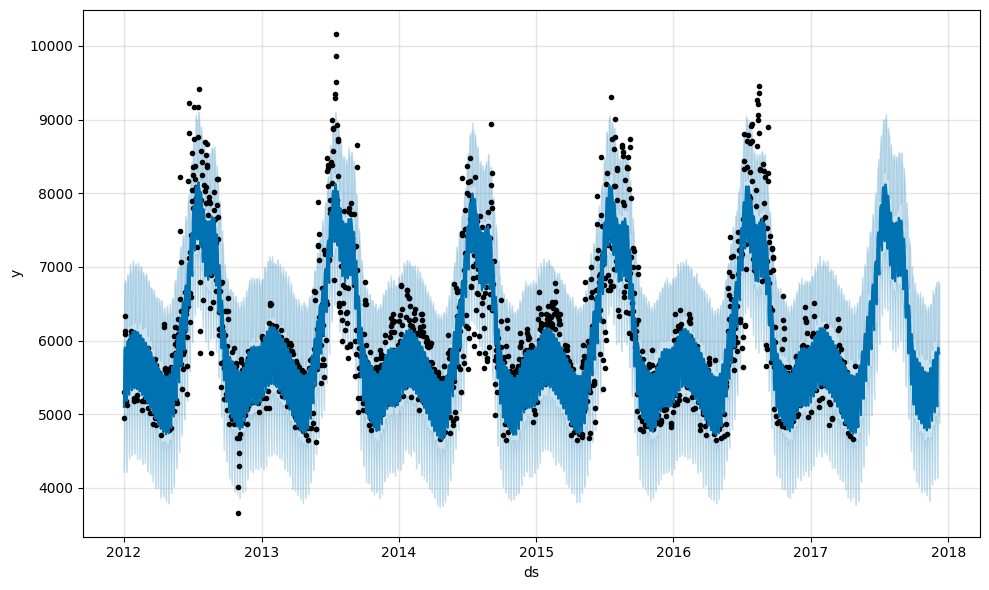

In [179]:
fig2 = model_daily.plot(forecast_daily)

In [180]:
cv_results_daily = cross_validation( model = model_daily, initial = '731 days', horizon = '365 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/y7nn4f2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/mfar3oia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88449', 'data', 'file=/tmp/tmpdwhekbxv/y7nn4f2z.json', 'init=/tmp/tmpdwhekbxv/mfar3oia.json', 'output', 'file=/tmp/tmpdwhekbxv/prophet_modelaxhkzal0/prophet_model-20230908154539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/cb3oe6nc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdwhekbxv/07wi05fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [181]:
data_metrics_daily = performance_metrics(cv_results_daily)
data_metrics_daily

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,252602.990343,502.596250,406.852846,0.073140,0.065546,0.072166,0.890110
1,37 days 00:00:00,259359.562083,509.273563,414.253006,0.074428,0.066277,0.073369,0.884615
2,37 days 12:00:00,261670.942033,511.537821,417.619669,0.075007,0.067088,0.073978,0.884615
3,38 days 00:00:00,264468.497021,514.265007,420.712918,0.075268,0.067529,0.074213,0.884615
4,38 days 12:00:00,268169.076131,517.850438,425.922733,0.076100,0.067960,0.075072,0.884615
...,...,...,...,...,...,...,...,...
653,363 days 00:00:00,262518.153951,512.365254,449.319838,0.082934,0.082209,0.082030,0.983516
654,363 days 12:00:00,264193.264368,513.997339,450.328695,0.083112,0.082474,0.082306,0.983516
655,364 days 00:00:00,268593.703232,518.260266,453.911891,0.083960,0.083197,0.083157,0.983516
656,364 days 12:00:00,268616.085161,518.281859,453.548281,0.083930,0.083197,0.083213,0.983516
